In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Palladium.csv')
df.head(5)

,Date,Open,Close,High,Low
0,2018-01-01,1067.5,1067.5,1067.5,1067.5
1,2018-01-02,1066.5,1096.0,1099.0,1066.0
2,2018-01-03,1095.5,1088.0,1097.0,1084.0
3,2018-01-04,1086.5,1102.5,1108.5,1083.5
4,2018-01-05,1100.0,1091.5,1103.0,1086.5


In [3]:
df.describe()

,Open,Close,High,Low
count,2344.000000,2344.000000,2344.00000,2344.000000
mean,1715.649548,1719.441446,1740.99904,1692.448699
std,568.943109,563.264625,578.31594,559.144233
min,0.000000,846.000000,0.00000,0.000000
25%,1214.750000,1215.875000,1228.18750,1195.375000
50%,1709.750000,1724.875000,1750.25000,1688.000000
75%,2182.000000,2182.750000,2214.50000,2146.750000
max,3205.000000,3178.000000,3435.50000,3008.000000


In [4]:
df.loc[0,:]

Date     2018-01-01
Open         1067.5
Close        1067.5
High         1067.5
Low          1067.5
Name: 0, dtype: object

In [5]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)
df

,Date,Open,Close,High,Low
0,2018-01-01,1067.5,1067.5,1067.5,1067.5
1,2018-01-02,1066.5,1096.0,1099.0,1066.0
2,2018-01-03,1095.5,1088.0,1097.0,1084.0
3,2018-01-04,1086.5,1102.5,1108.5,1083.5
4,2018-01-05,1100.0,1091.5,1103.0,1086.5
...,...,...,...,...,...
2339,2024-05-28,995.5,975.5,997.0,969.5
2340,2024-05-29,982.5,968.0,983.0,946.5
2341,2024-05-30,957.0,950.5,962.0,932.5
2342,2024-05-31,949.5,914.5,956.0,903.5


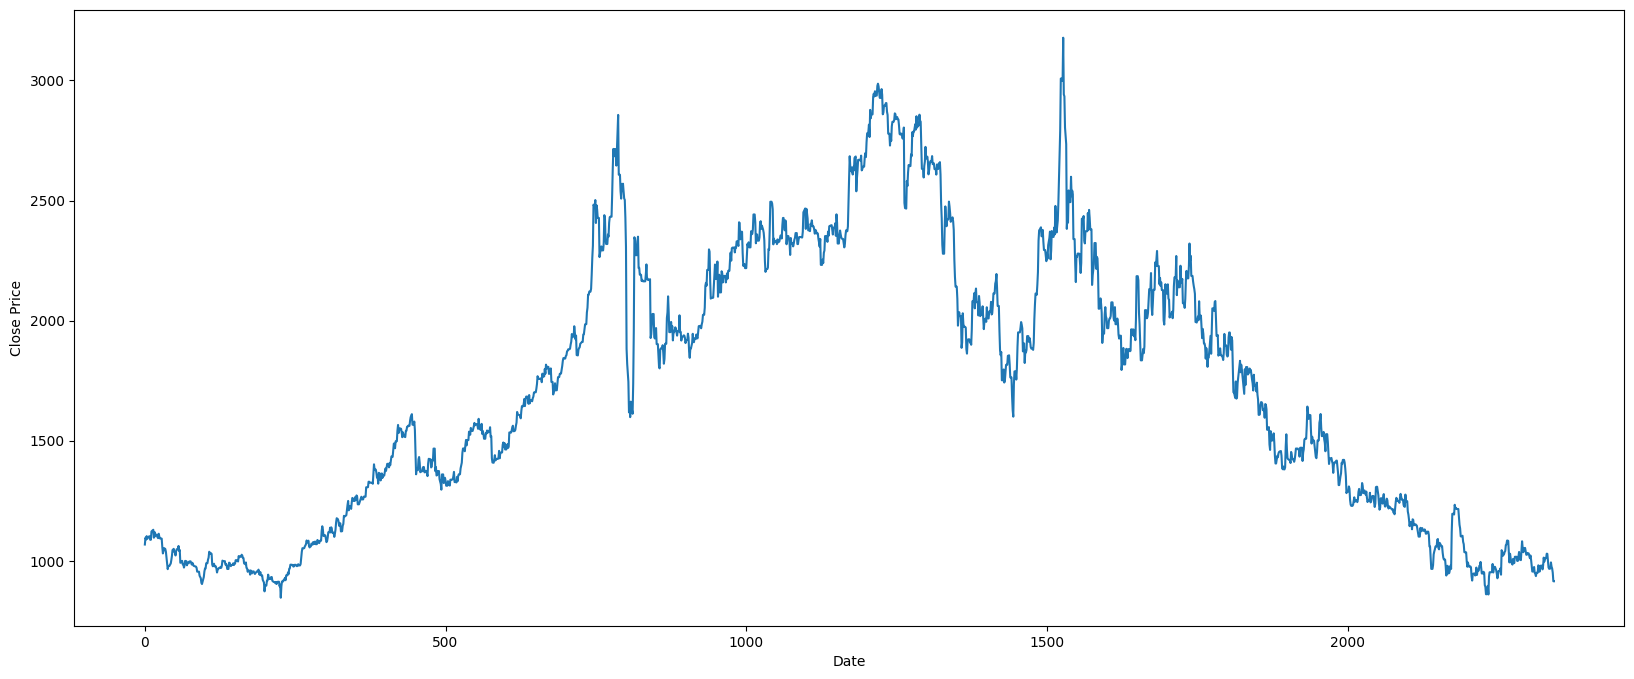

In [6]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1067.5
1,1096.0
2,1088.0
3,1102.5
4,1091.5


In [8]:
#Scaler data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [10]:
train_data

array([[0.09498285],
       [0.10720412],
       [0.10377358],
       ...,
       [0.49871355],
       [0.51114923],
       [0.51114923]])

In [11]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [12]:
#Thiết lập tham số cho model
lags = 100
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [13]:
X_test

array([[0.51114923, 0.52830189, 0.50578902, ..., 0.63582762, 0.64215266,
        0.6537307 ],
       [0.52830189, 0.50578902, 0.5079331 , ..., 0.64215266, 0.6537307 ,
        0.6042024 ],
       [0.50578902, 0.5079331 , 0.52251286, ..., 0.6537307 , 0.6042024 ,
        0.61963979],
       ...,
       [0.04652659, 0.06024871, 0.04502573, ..., 0.05231561, 0.06303602,
        0.05553173],
       [0.06024871, 0.04502573, 0.05317324, ..., 0.06303602, 0.05553173,
        0.05231561],
       [0.04502573, 0.05317324, 0.05510292, ..., 0.05553173, 0.05231561,
        0.04481132]])

In [14]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1305, 100) (1305,)
(837, 100) (837,)


In [15]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [16]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [17]:
y_pred

array([2214.54459934, 2156.14781661, 2131.75248031, 2175.34301598,
       2183.33422038, 2204.60232385, 2244.09487422, 2294.06884522,
       2296.27560503, 2352.11541694, 2354.62609969, 2350.93572048,
       2375.98608378, 2397.21927744, 2456.44292562, 2511.32281652,
       2548.33311719, 2613.01313889, 2757.08843917, 2818.10085172,
       2826.6159303 , 2826.63696495, 2898.12838194, 2850.1788244 ,
       2805.44180128, 2716.72519439, 2645.02062981, 2566.55829115,
       2362.29734924, 2282.28504786, 2252.59048655, 2297.19594199,
       2316.95938027, 2343.53685286, 2356.7834961 , 2377.45733184,
       2337.92702081, 2331.49624732, 2347.14062754, 2251.72292104,
       2219.68809183, 2239.11321296, 2179.54969382, 2111.35678111,
       2122.32065731, 2160.50925304, 2247.0693311 , 2325.24109137,
       2379.47304495, 2424.81618185, 2441.351052  , 2399.9936001 ,
       2426.91003685, 2524.39677481, 2508.18346222, 2526.08481693,
       2507.22653862, 2435.33019117, 2375.16282843, 2370.63683

In [18]:
train_size1 = int(0.6 * len(df))
test_size1 = len(df) - train_size

train_data1 = df[:train_size]
test_data1 = df[train_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

In [19]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE
#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test1[lags + 1:])
#MSE
test_mse = mean_squared_error(y_pred, y_test1[lags + 1:])
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MSE: 21090.34976296982
Testing RMSE: 145.22516917865795
Testing MAPE: 0.08682758523252238


In [20]:
# Dự báo 30 ngày tiếp theo
x_input = test_data[60:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output=[]
i=0

while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.05510292 0.05510292 0.051994   0.04888508 0.04266724 0.03473413
 0.0415952  0.04781304 0.04802744 0.04824185 0.05253002 0.04116638
 0.08490566 0.08211835 0.07482847 0.07622213 0.07761578 0.08168954
 0.0834048  0.09412521 0.09498285 0.10205832 0.10205832 0.10141509
 0.08018868 0.06303602 0.07847341 0.06989708 0.06282161 0.06282161
 0.05917667 0.06925386 0.06410806 0.06174957 0.07311321 0.07311321
 0.07311321 0.07311321 0.06560892 0.06582333 0.07311321 0.08168954
 0.06818182 0.06818182 0.06710978 0.08554889 0.10077187 0.08897942
 0.08126072 0.0885506  0.0885506  0.08897942 0.08233276 0.07675815
 0.07675815 0.07997427 0.07911664 0.07911664 0.07482847 0.07054031
 0.0754717  0.06753859 0.05617496 0.04674099 0.04674099 0.05081475
 0.05488851 0.04459691 0.04266724 0.03859348 0.04459691 0.04459691
 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825

In [21]:
# 13. Dự báo 60 ngày tiếp theo
x_input = test_data[60:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60=[]
i=0

while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.05510292 0.05510292 0.051994   0.04888508 0.04266724 0.03473413
 0.0415952  0.04781304 0.04802744 0.04824185 0.05253002 0.04116638
 0.08490566 0.08211835 0.07482847 0.07622213 0.07761578 0.08168954
 0.0834048  0.09412521 0.09498285 0.10205832 0.10205832 0.10141509
 0.08018868 0.06303602 0.07847341 0.06989708 0.06282161 0.06282161
 0.05917667 0.06925386 0.06410806 0.06174957 0.07311321 0.07311321
 0.07311321 0.07311321 0.06560892 0.06582333 0.07311321 0.08168954
 0.06818182 0.06818182 0.06710978 0.08554889 0.10077187 0.08897942
 0.08126072 0.0885506  0.0885506  0.08897942 0.08233276 0.07675815
 0.07675815 0.07997427 0.07911664 0.07911664 0.07482847 0.07054031
 0.0754717  0.06753859 0.05617496 0.04674099 0.04674099 0.05081475
 0.05488851 0.04459691 0.04266724 0.03859348 0.04459691 0.04459691
 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825

In [22]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
i=0

while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.05510292 0.05510292 0.051994   0.04888508 0.04266724 0.03473413
 0.0415952  0.04781304 0.04802744 0.04824185 0.05253002 0.04116638
 0.08490566 0.08211835 0.07482847 0.07622213 0.07761578 0.08168954
 0.0834048  0.09412521 0.09498285 0.10205832 0.10205832 0.10141509
 0.08018868 0.06303602 0.07847341 0.06989708 0.06282161 0.06282161
 0.05917667 0.06925386 0.06410806 0.06174957 0.07311321 0.07311321
 0.07311321 0.07311321 0.06560892 0.06582333 0.07311321 0.08168954
 0.06818182 0.06818182 0.06710978 0.08554889 0.10077187 0.08897942
 0.08126072 0.0885506  0.0885506  0.08897942 0.08233276 0.07675815
 0.07675815 0.07997427 0.07911664 0.07911664 0.07482847 0.07054031
 0.0754717  0.06753859 0.05617496 0.04674099 0.04674099 0.05081475
 0.05488851 0.04459691 0.04266724 0.03859348 0.04459691 0.04459691
 0.04459691 0.05789022 0.05638937 0.04652659 0.05295883 0.057247
 0.057247   0.057247   0.05060034 0.05767581 0.07161235 0.06453688
 0.07054031 0.07054031 0.07054031 0.07868782 0.07825

In [23]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

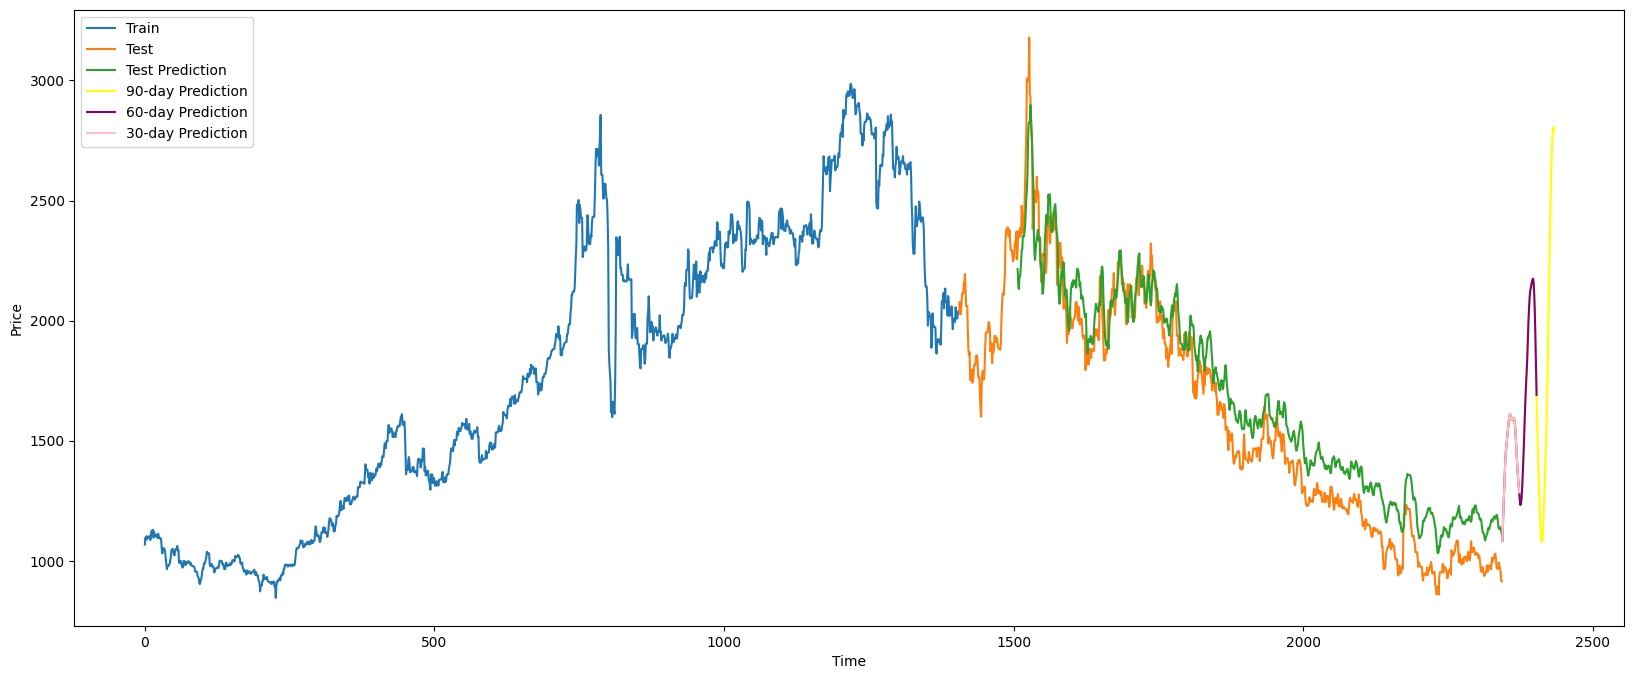

In [24]:
train_data_index = pd.RangeIndex(start=0, stop = train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start = train_size, stop = train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start = train_size + lags + 1, stop = train_size + test_size, step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()